**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

* NOMBRE: Carlos Alejandro Herrera Legaspi, MATRÍCULA: A01751709
* NOMBRE: Hesus García Cobos, MATRÍCULA: A01129778
* NOMBRE: Rafael Mandujano Núñez, MATRÍCULA: A00824644
* NOMBRE: Omar Aguilar Macedo, MATRÍCULA: A01797078

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
DIR = "/content/drive/MyDrive/TC4029/actividades/07"
os.chdir(DIR)

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [189]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [190]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [191]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [192]:
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

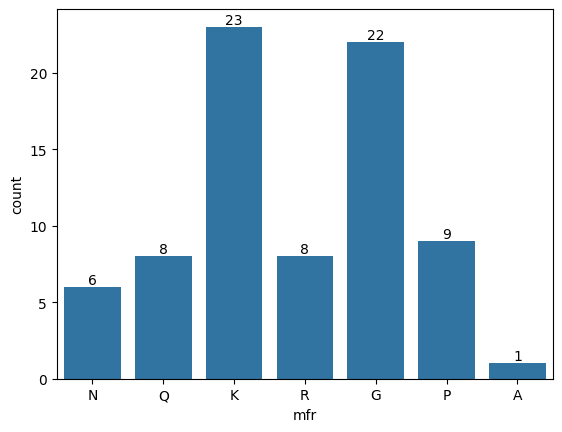

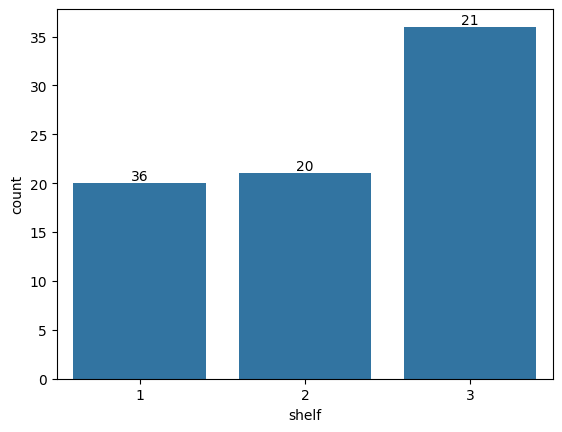

In [193]:
def draw_countplot(col, df):
  ax = sns.countplot(x = col, data = cereals_df)
  col_counts = cereals_df[col].value_counts(sort = False).values
  ax.bar_label(container = ax.containers[0], labels = col_counts)
  plt.show()

columns = ['mfr', 'shelf']
for col in columns:
  draw_countplot(col, cereals_df)

In [194]:
# Frequencias por fabricante 'mfr'
cereals_df['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


In [195]:
# Frecuencias por estante de exhibición
cereals_df['shelf'].value_counts()

,count
shelf,
3,36
2,21
1,20


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

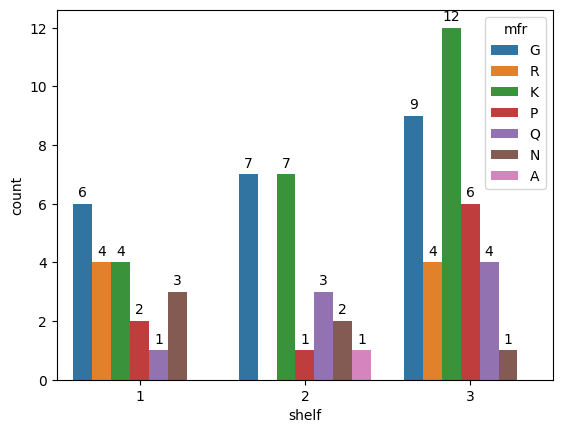

In [196]:
# opción con pandas plot
# counts_by_shelf = cereals_df.groupby(['shelf', 'mfr']).size().unstack(fill_value=0)
# ax = counts_by_shelf.plot(kind='bar', stacked=False, figsize=(8, 6))

# opcion con seaborn
ax = sns.countplot(data = cereals_df, x='shelf', hue='mfr')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

In [197]:
cereals_df.groupby('mfr')['shelf'].value_counts().unstack(fill_value = 0)

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [198]:
# bins = np.arange(0, 101, 10)
bins = np.histogram_bin_edges(cereals_df['rating'])
bins_df = pd.cut(
    cereals_df['rating'],
    bins = bins,
    precision = 0
).value_counts(sort = False)

print(f"bins: {bins}")
print(f"min: {cereals_df['rating'].min()}, max: {cereals_df['rating'].max()}")

bins: [18.042851  25.6090571 33.1752632 40.7414693 48.3076754 55.8738815
 63.4400876 71.0062937 78.5724998 86.1387059 93.704912 ]
min: 18.042851, max: 93.704912


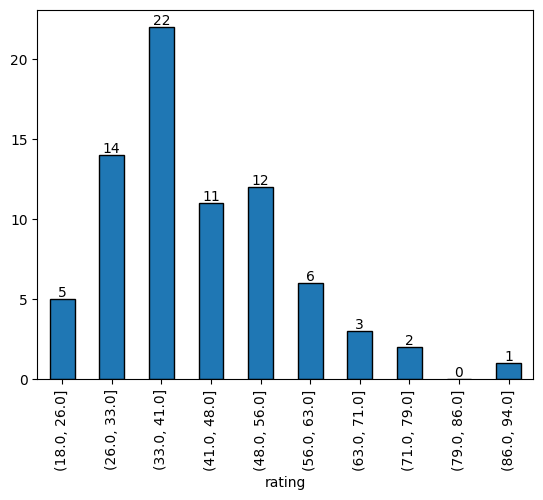

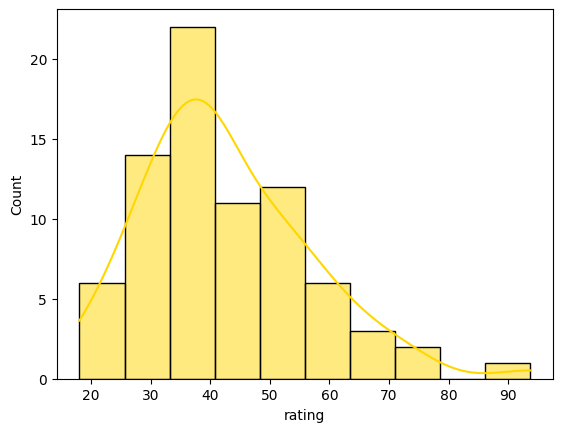

In [199]:
ax = bins_df.plot(kind='bar', edgecolor='black')
ax.bar_label(container = ax.containers[0], labels = bins_df.values)
plt.show()

# como histograma
sns.histplot(cereals_df['rating'], color = 'gold', kde = True)
plt.show()

In [200]:
# rango con más valores
bins_df.sort_values(ascending = False).head(1)

,count
rating,
"(33.0, 41.0]",22


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [201]:
top_10_cereals_df = cereals_df[['name', 'rating', 'mfr']].nlargest(10, 'rating')

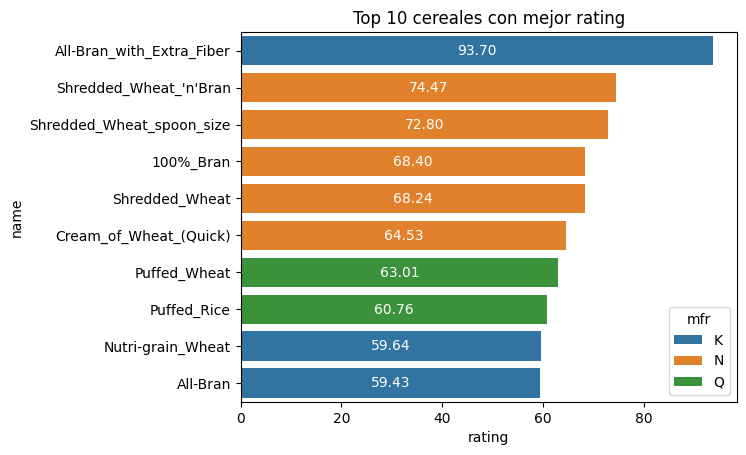

In [202]:
ax = sns.barplot(data = top_10_cereals_df, y='name', x='rating', hue = 'mfr')
plt.title('Top 10 cereales con mejor rating')
for index, value in enumerate(top_10_cereals_df['rating']):
    ax.text(
        value / 2,
        index,
        "{:.2f}".format(value),
        va = 'center',
        ha = 'center',
        color = 'white'
    )

In [203]:
top_10_cereals_df

,name,rating,mfr
3,All-Bran_with_Extra_Fiber,93.704912,K
64,Shredded_Wheat_'n'Bran,74.472949,N
65,Shredded_Wheat_spoon_size,72.801787,N
0,100%_Bran,68.402973,N
63,Shredded_Wheat,68.235885,N
20,Cream_of_Wheat_(Quick),64.533816,N
55,Puffed_Wheat,63.005645,Q
54,Puffed_Rice,60.756112,Q
50,Nutri-grain_Wheat,59.642837,K
2,All-Bran,59.425505,K


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

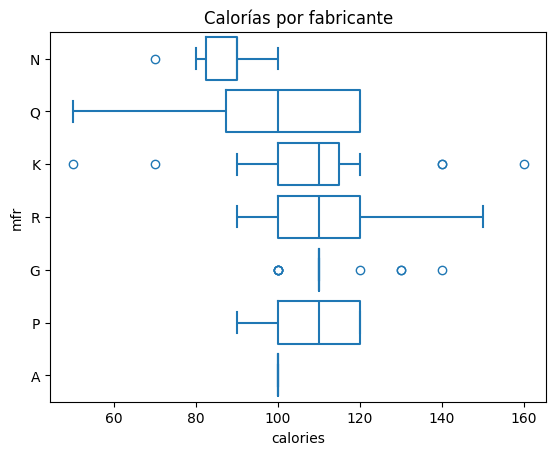

In [204]:
sns.boxplot(data = cereals_df, x = 'calories', y = "mfr", fill = False)
plt.title('Calorías por fabricante')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [205]:
corr_mat = cereals_df.corr(numeric_only = True)
corr_mat['rating'].drop('rating').abs().nlargest(2)

,rating
sugars,0.763902
calories,0.689376


<Axes: >

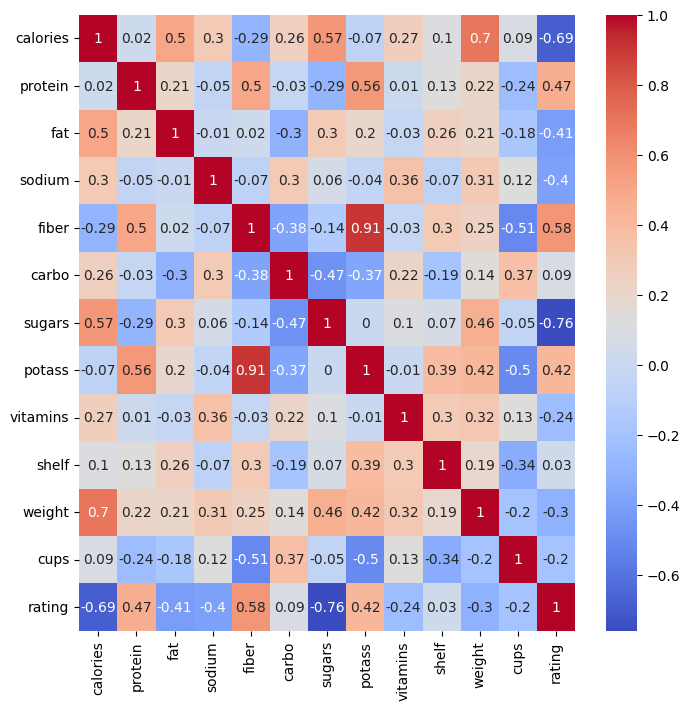

In [206]:
# El mapa de calor nos confirma las variables con mayor correlación con rating
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(round(corr_mat, 2), annot = True, ax = ax, cmap = 'coolwarm')

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [207]:
# filas con valores faltantes
cereals_df[cereals_df.isna().any(axis=1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


In [208]:
cereals_df = cereals_df.dropna().reset_index(drop = True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [209]:
numeric_columns = cereals_df.describe().columns
x = cereals_df[numeric_columns].iloc[:,0:-2]
y = cereals_df[numeric_columns].loc[:,'rating']

In [210]:
x.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0


In [211]:
y.head(1)

,rating
0,68.402973


In [212]:
n_components = x.shape[1]
print(f"Número de componentes: {n_components}")

Número de componentes: 11


In [213]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)

# imprimimos una muestra de los datos escalados
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332]])

In [214]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)

# imprimimos una muestra de los datos aplicando PCA
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,3.582956,-3.870102,-0.257215,0.216143,-1.192099,0.849177,0.238406,-0.108295,0.003803,-0.263560,0.014400
1,2.076387,-0.420628,-3.253143,-0.299790,3.055089,0.542565,-0.141738,-0.905962,0.479525,0.044919,-0.040179
2,3.582593,-3.326422,0.699859,-0.144864,-1.388317,1.810421,-0.404484,0.141211,-0.092549,0.459224,-0.059890
3,3.813566,-5.578544,1.554285,0.179037,-1.847600,0.532651,-0.438779,-0.734325,-0.114501,-0.673866,0.140939
4,-0.415239,0.471249,-1.436720,-0.960189,-0.256783,0.987721,0.711954,-0.668661,0.164885,-0.122784,-0.089280


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [215]:
print("Valores propios: ", list(np.round(pca.explained_variance_, decimals=5)))

Valores propios:  [3.01281, 2.63539, 1.79934, 1.03111, 0.99162, 0.68802, 0.49971, 0.31853, 0.09654, 0.05883, 0.01879]


In [216]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"varianza acumulada: {varianza_acumulada}")

# componentes requeridos para explicar mas del 90% de la varianza
num_componentes = np.argmax(varianza_acumulada >= .9 ) + 1
print(f"Se necesitan {num_componentes} componentes para explicar el 90% de la varianza")


varianza acumulada: [0.27019073 0.50653376 0.66789951 0.7603703  0.84929922 0.91100122
 0.95581536 0.98438162 0.99303962 0.99831514 1.        ]
Se necesitan 6 componentes para explicar el 90% de la varianza


In [217]:
cumulative = 0
for i in range(0, n_components):
  comp_perc = round(pca.explained_variance_ratio_[i] * 100, 2)
  cumulative = cumulative + comp_perc
  comp_perc_str = "{:.2f}".format(comp_perc)
  cumulative_str = "{:.0f}".format(cumulative)
  print(f"El porcentaje de varianza acumulada explicada por el componente {i + 1} es {comp_perc_str}%, acumulado: {cumulative_str}%")


El porcentaje de varianza acumulada explicada por el componente 1 es 27.02%, acumulado: 27%
El porcentaje de varianza acumulada explicada por el componente 2 es 23.63%, acumulado: 51%
El porcentaje de varianza acumulada explicada por el componente 3 es 16.14%, acumulado: 67%
El porcentaje de varianza acumulada explicada por el componente 4 es 9.25%, acumulado: 76%
El porcentaje de varianza acumulada explicada por el componente 5 es 8.89%, acumulado: 85%
El porcentaje de varianza acumulada explicada por el componente 6 es 6.17%, acumulado: 91%
El porcentaje de varianza acumulada explicada por el componente 7 es 4.48%, acumulado: 96%
El porcentaje de varianza acumulada explicada por el componente 8 es 2.86%, acumulado: 98%
El porcentaje de varianza acumulada explicada por el componente 9 es 0.87%, acumulado: 99%
El porcentaje de varianza acumulada explicada por el componente 10 es 0.53%, acumulado: 100%
El porcentaje de varianza acumulada explicada por el componente 11 es 0.17%, acumulad

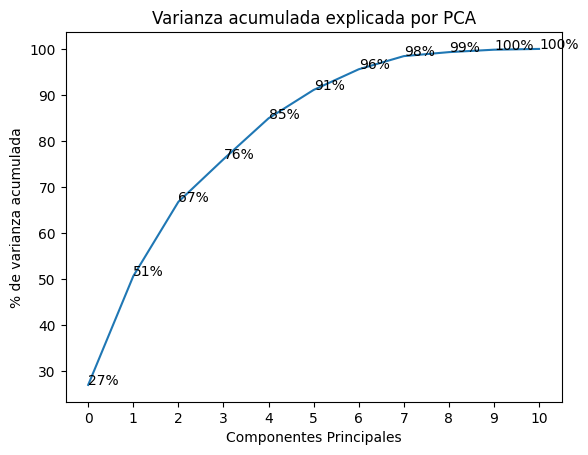

In [218]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('% de varianza acumulada')
plt.xticks(np.arange(0,n_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(n_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [219]:
pc_df = pd.DataFrame(
    abs(pca.components_[:num_componentes]),
    columns = x.columns,
    index=['Principal component {}'.format(i) for i in range(1, num_componentes + 1)]
)
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight
Principal component 1,0.173442,0.351550,0.276118,0.025389,0.427620,0.221149,0.158439,0.507167,0.108208,0.327445,0.369363
Principal component 2,0.548255,0.158987,0.183628,0.307659,0.335093,0.239005,0.343974,0.222232,0.274736,0.023214,0.364187
Principal component 3,0.066009,0.294487,0.305160,0.359750,0.137392,0.539681,0.493003,0.091787,0.331621,0.015939,0.120591
Principal component 4,0.158163,0.259223,0.096264,0.185144,0.078863,0.071477,0.004372,0.110880,0.591912,0.679019,0.170806
Principal component 5,0.203873,0.356252,0.591618,0.267751,0.253642,0.232996,0.377974,0.151443,0.142766,0.235614,0.222489
Principal component 6,0.192185,0.002167,0.390949,0.726256,0.000207,0.342419,0.062824,0.043057,0.140034,0.048569,0.371149


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [220]:
top_n_vars = 3
first_component_abs_values = abs(pc_df).iloc[0:1]
sorted_PC1 = first_component_abs_values.T.sort_values(by = 'Principal component 1', ascending = False)

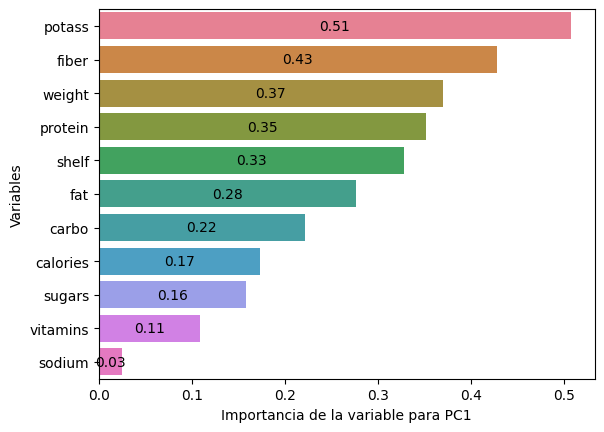

In [221]:
ax = sns.barplot(data=sorted_PC1.T, orient = 'h')
plt.xlabel('Importancia de la variable para PC1')
plt.ylabel('Variables')

for index, value in enumerate(sorted_PC1.T.values[0]):
    ax.text(
        value / 2,
        index,
        "{:.2f}".format(value),
        va = 'center',
        ha = 'center'
    )

In [222]:
# Top 3 variables mas imprtantes para PC1
sorted_PC1.head(3)

,Principal component 1
potass,0.507167
fiber,0.427620
weight,0.369363


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

mfr,A,G,K,N,P,Q,R
shelf,,,,,,,
1,0.000000,39.872079,42.747695,71.836874,31.997429,0.000000,45.587913
2,54.850917,26.069929,37.131878,59.363993,28.025765,28.414072,0.000000
3,0.000000,37.440751,48.497559,68.402973,47.221846,51.814328,38.535828


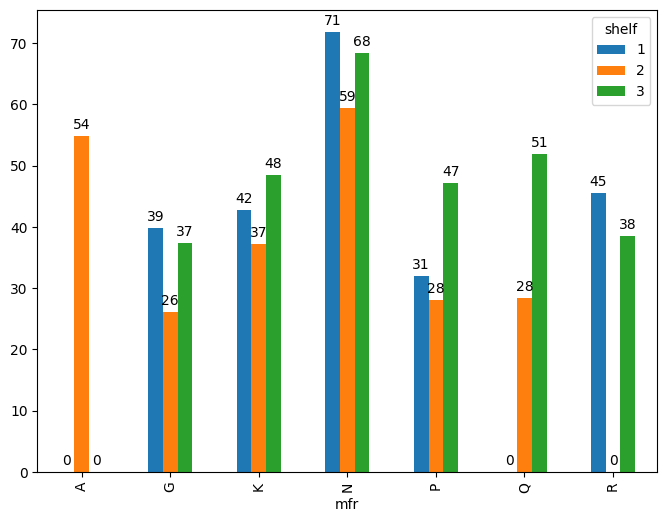

In [223]:
# exploramos un poco como pueden reslacionarse shelf y mfr con el rating

mfr_shelf_rating_df = cereals_df.groupby(['shelf', 'mfr'])['rating'].mean()
mfr_shelf_rating_df = mfr_shelf_rating_df.unstack(fill_value=0)

ax = mfr_shelf_rating_df.T.plot(kind='bar', stacked=False, figsize=(8, 6))

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

mfr_shelf_rating_df

In [224]:
from sklearn.preprocessing import OneHotEncoder

# MFR puede ser útil ya que si vemos los box plots
# y los el top 10 de cereales con mejor ranking
# podemos ver que por ejemplo nabisco esta entre los mejores calificados
# y al mismo tiempo es de los que tienen menos calorías
# entonces la compaǹia puede ser un factor al momento de elegir un cereal.
#
# Shelf puede ser útil si nos basamos en el dataframe mfr_shelf_rating_df
# en el que con los datos del dataframe, podemos observar que los cereales
# en el 2ndo shelf son los que en promedio parecen tener una tendencia
# a tener menores ratings

# Utilizaremos one hot encoding ya que las variables categorias
# son independientes

useful_categorical_cols = ['mfr', 'shelf']
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = encoder.fit_transform(cereals_df[useful_categorical_cols])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())
df_encoded

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [225]:
results_df = x_projected.iloc[:,0:num_componentes]
results_df.columns = ['PC{}'.format(i) for i in range(1, num_componentes + 1)]
results_df = pd.concat([results_df, df_encoded, y], axis=1)
results_df


,PC1,PC2,PC3,PC4,PC5,PC6,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3,rating
0,3.582956,-3.870102,-0.257215,0.216143,-1.192099,0.849177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,2.076387,-0.420628,-3.253143,-0.299790,3.055089,0.542565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33.983679
2,3.582593,-3.326422,0.699859,-0.144864,-1.388317,1.810421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,3.813566,-5.578544,1.554285,0.179037,-1.847600,0.532651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,-0.415239,0.471249,-1.436720,-0.960189,-0.256783,0.987721,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.072746,0.826924,1.300651,0.485355,0.917429,0.275020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.297030,0.922990,-1.624471,0.366209,-0.535463,-0.040495,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,-0.472279,-0.457320,1.245263,-1.386176,-0.033231,0.636381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.787445
72,-0.517565,-0.553809,1.107462,-1.310737,0.075234,0.374410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [226]:
results_df.to_csv('PCAresults.csv')